In [2]:
## REQUIRED LIBRARIES

# Data Wrangling 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Expand the displayed columns and rows
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

# Import data

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Preparation

In [4]:
df.shape

(10000, 14)

The df has 1000 rows and 14 attributes.
The aim is to use this dataset to predict whether a bank's customers leave the bank or not. If the client has closed his/her bank account, he /she has left.
*   RowNumber: corresponds to the record (row) number and has no effect on the output.
* CustomerId: contains random values and has no effect on customer leaving the bank.
* Surname: the surname of a customer has no impact on their decision to leave the bank.
* CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.
* Geography: a customer’s location can affect their decision to leave the bank.
* Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.
* Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.
* Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts: refers to the number of products that a customer has purchased through the bank.
* HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember: active customers are less likely to leave the bank.
* EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited: whether or not the customer left the bank. (0=No,1=Yes)





## Check columns list and missing values


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Get unique count for each variable

In [6]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

## Remove the first 2 attributes (not require)

In [27]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Check statistics descriptive (numerical)

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Check statistics descriptive (categorical)

In [12]:
df.describe(include = 'object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


## Check variabe data types

In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Exploratory Data Analysis

## Features vs Targets
So about 20% of the customers have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

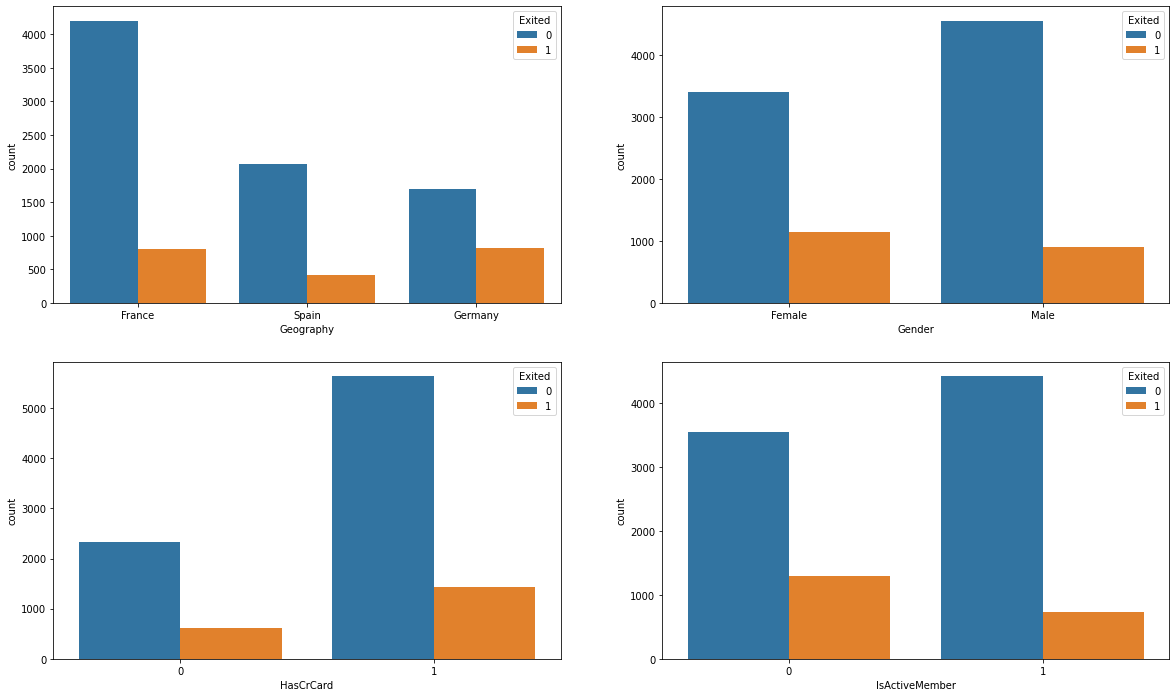

In [17]:
# Review the 'Status' relation with the categorical variables
fig, axarr = plt.subplots(2,2, figsize = (20, 12))
sns.countplot(x = 'Geography', hue = 'Exited', data = df, ax = axarr [0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax = axarr [0][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited', data = df, ax = axarr [1][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = df, ax = axarr [1][1])

We note the following:
* Majority of the data is from person from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service recources allocated) in the areas where it has fewer clients.
* The proportion of female customers churning is also greater than taht of male customers.
* Interestingly, majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a concidence.
* Unsurprisingly the inactive members have a greater churn. Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers as this will definately have a positive impact on the customer churn.   

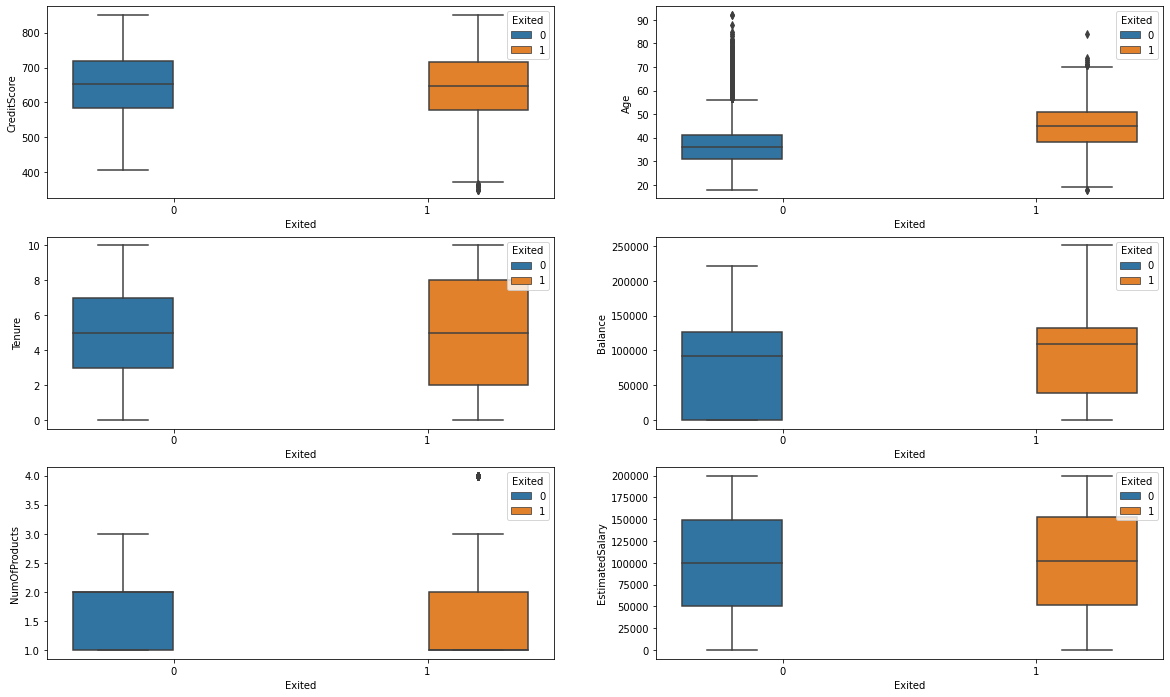

In [18]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize = (20, 12))
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data = df, ax = axarr [0][0])
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data = df, ax = axarr [0][1])
sns.boxplot(y = 'Tenure', x = 'Exited', hue = 'Exited', data = df, ax = axarr [1][0])
sns.boxplot(y = 'Balance', x = 'Exited', hue = 'Exited', data = df, ax = axarr [1][1])
sns.boxplot(y = 'NumOfProducts', x = 'Exited', hue = 'Exited', data = df, ax = axarr [2][0])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', hue = 'Exited', data = df, ax = axarr [2][1])

We note the following:
* There is no significant different in the credit score distribution between retained and churned customers.
* The older customers are churning at more that the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups.
* With regard to the tenure, the cliens on their extrene end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.
* Worryingly, the bank is losing customers with significant bank balances which is likely to hit their available capital for lending.
* Neither the product nor the salary has a significant effect on the likelihood to churn.

## Correlation Matrix

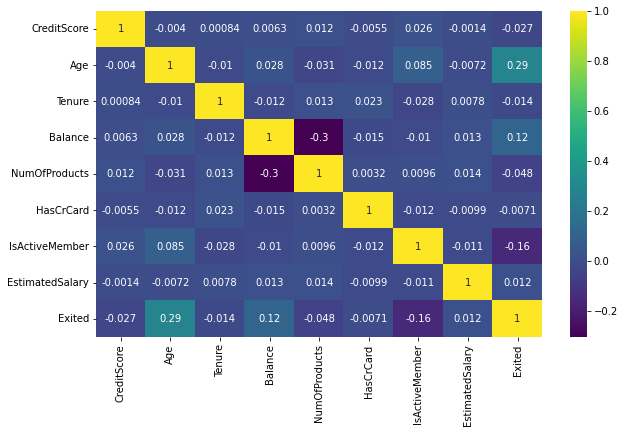

In [19]:
cm = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, cmap = 'viridis')

## Check Imbalance Target Variable

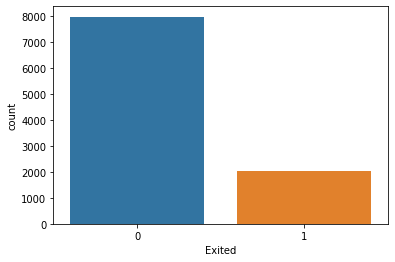

In [20]:
sns.countplot(x = 'Exited', data = df)

# Feature Engineering
We seek to add features that are likely to have an impact on the probability of churning. We first split the train and test sets 

In [28]:
df_fe =  df.copy()

In [29]:
# Balance Salary Ratio
df_fe['BalanceSalaryRatio'] = df_fe['Balance'] / df_fe['EstimatedSalary']

# Given that tenure is a 'function' of age, we introduce a variable aiming tenure over age
df_fe['TenureByAge'] = df_fe['Tenure'] / df_fe['Age']

# Credit score given age to take into account credit behaviour visavis adult life
df_fe['CreditScoreGivenAge'] = df_fe['CreditScore'] / df_fe['Age']

In [30]:
df_fe

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000,0.128205,19.769231
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108,0.285714,14.742857
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000,0.194444,19.694444
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808230,0.071429,18.380952


# Data Preparation for modelling fitting


## One hot encoder

In [33]:
from sklearn.preprocessing import OneHotEncoder
lst = ['Geography', 'Gender']
ohe = OneHotEncoder()
ohe.fit(df_fe[lst])
df_ohe_res = pd.DataFrame(ohe.transform(df_fe[lst]).toarray(),
                           columns = ohe.get_feature_names_out())
df_fe = pd.concat([df_fe, df_ohe_res], axis = 1)
df_fe.drop(columns = lst, inplace = True)
df_fe.head

<bound method NDFrame.head of       CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  BalanceSalaryRatio  \
0                  1        101348.88       1   

## Min max scalling


In [34]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(df_fe)
df_fe = pd.DataFrame(mm.transform(df_fe), columns = df_fe.columns)

df_fe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,0.000000,0.085714,0.235083,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.000070,0.043902,0.237252,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,0.000132,0.342857,0.168807,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,0.000000,0.046154,0.310859,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.000150,0.083721,0.354739,0.0,0.0,1.0,1.0,0.0


## Split train & test data

In [35]:
from sklearn.model_selection import train_test_split

X = df_fe.drop(columns = ['Exited']).copy()
y = df_fe['Exited'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25,
                                                    random_state = 42)
print(len(X_train))
print(len(X_test))

7500
2500


# Model fitting and selection

In [46]:
# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Scoring function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Model fitting

### Logistic regression

In [37]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

### KNN

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Random forest

In [39]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### Naive Bayes

In [40]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### Decision tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

### SVM

In [59]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

### Gradient boosting classifier

In [47]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

## Review best model fit accuracy

### Logistic regression

In [43]:
y_pred_log = log.predict(X_test)
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89      2003
         1.0       0.58      0.21      0.31       497

    accuracy                           0.81      2500
   macro avg       0.70      0.59      0.60      2500
weighted avg       0.78      0.81      0.78      2500



### KNN

In [44]:
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      2003
         1.0       0.56      0.30      0.39       497

    accuracy                           0.81      2500
   macro avg       0.70      0.62      0.64      2500
weighted avg       0.79      0.81      0.79      2500



### Random forest

In [45]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92      2003
         1.0       0.78      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500



### Naive Bayes

In [48]:
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89      2003
         1.0       0.60      0.32      0.42       497

    accuracy                           0.82      2500
   macro avg       0.72      0.63      0.66      2500
weighted avg       0.80      0.82      0.80      2500



### Decision tree

In [49]:
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      2003
         1.0       0.47      0.49      0.48       497

    accuracy                           0.79      2500
   macro avg       0.67      0.68      0.67      2500
weighted avg       0.79      0.79      0.79      2500



### SVM

In [60]:
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91      2003
         1.0       0.81      0.23      0.35       497

    accuracy                           0.84      2500
   macro avg       0.82      0.61      0.63      2500
weighted avg       0.83      0.84      0.80      2500



### Gradient boosting classifier

In [51]:
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2003
         1.0       0.77      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500



## Accuracy figure

In [52]:
def get_auc_scores(y_actual, y_pred, y_proba):
  auc_score = roc_auc_score(y_actual, y_pred);
  fpr_df, tpr_df, _ = roc_curve(y_actual, y_proba);
  return (auc_score, fpr_df, tpr_df)

In [61]:
auc_log, fpr_log, tpr_log = get_auc_scores(y,
                                           log.predict(X),
                                           log.predict_proba(X)[:,1])
auc_knn, fpr_knn, tpr_knn = get_auc_scores(y,
                                           knn.predict(X),
                                           knn.predict_proba(X)[:,1])
auc_rf, fpr_rf, tpr_rf = get_auc_scores(y,
                                           rf.predict(X),
                                           rf.predict_proba(X)[:,1])
auc_nb, fpr_nb, tpr_nb = get_auc_scores(y,
                                           nb.predict(X),
                                           nb.predict_proba(X)[:,1])
auc_dt, fpr_dt, tpr_dt = get_auc_scores(y,
                                           dt.predict(X),
                                           dt.predict_proba(X)[:,1])
auc_gbc, fpr_gbc, tpr_gbc = get_auc_scores(y,
                                           gbc.predict(X),
                                           gbc.predict_proba(X)[:,1])

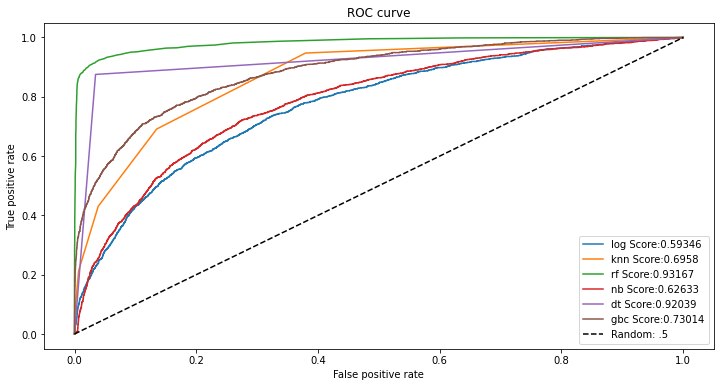

In [62]:
plt.figure(figsize = (12, 6), linewidth = 1)
plt.plot(fpr_log, tpr_log, label = 'log Score:' + str(round(auc_log, 5)))
plt.plot(fpr_knn, tpr_knn, label = 'knn Score:' + str(round(auc_knn, 5)))
plt.plot(fpr_rf, tpr_rf, label = 'rf Score:' + str(round(auc_rf, 5)))
plt.plot(fpr_nb, tpr_nb, label = 'nb Score:' + str(round(auc_nb, 5)))
plt.plot(fpr_dt, tpr_dt, label = 'dt Score:' + str(round(auc_dt, 5)))
plt.plot(fpr_gbc, tpr_gbc, label = 'gbc Score:' + str(round(auc_gbc, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: .5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc = 'best')
# plt.savefig('roc_results_ratios.png')
plt.show()

## Resampling to handle imbalance dataset

In [63]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [64]:
y_train.value_counts()

0.0    5960
1.0    1540
Name: Exited, dtype: int64

In [65]:
y_smote.value_counts()

1.0    5960
0.0    5960
Name: Exited, dtype: int64

## Fit random forest classifier

In [66]:
rf_smote = RandomForestClassifier()
rf_smote.fit(X_smote, y_smote)

RandomForestClassifier()

In [67]:
y_pred_smote = rf_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90      2003
         1.0       0.58      0.59      0.59       497

    accuracy                           0.83      2500
   macro avg       0.74      0.74      0.74      2500
weighted avg       0.84      0.83      0.83      2500



# Feature importance

<BarContainer object of 16 artists>

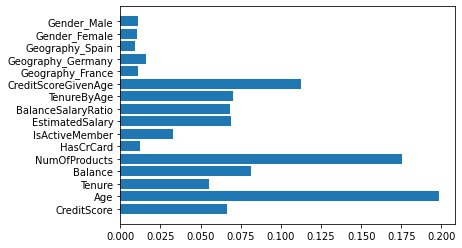

In [68]:
fi = rf_smote.feature_importances_
col = X_train.columns
plt.barh(col, fi)

In [69]:
df.groupby('Exited')['Age'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

In [70]:
pd.crosstab(df['NumOfProducts'], df['Exited'])

Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60
